<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Supervised_learning_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_edited.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0      yes_es       yes_ec           no_em  
1      yes_es       yes_ec           no_em  
2      yes_es       yes_ec          yes_em  
3      yes_es        no_ec          yes_em  
4      yes_es        no_ec          yes_em  


In [ ]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes_es,yes_ec,yes_em
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [ ]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [ ]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [ ]:
#do testing/training split - need different code for own data b/c no .data or .target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [ ]:
X_train.shape

(96, 40)

In [ ]:
X_test.shape

(33, 40)

In [ ]:
y_train.shape

(96,)

In [ ]:
y_test.shape

(33,)

# k-Nearest Neighbors

### Import and instantiate the class - set paraneter of # neighbors

In [ ]:
#import and instantiate the class - set paraneter of # neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)

### Fit classifier using training set

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Call the predict() method to make predictions on test data - will compute closest neighboro in training set

In [ ]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: ['C' 'C' 'A' 'C' 'B' 'A' 'B' 'C' 'E' 'A' 'A' 'C' 'C' 'B' 'B' 'B' 'C' 'B'
 'A' 'A' 'C' 'A' 'B' 'E' 'C' 'E' 'B' 'C' 'B' 'A' 'B' 'B' 'A']


Use score() method to evaluate how well model generalizes

In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.45


**Model is 45% accurate = correctly predicted the class for 45% of the samples in test dataset**

> Add blockquote



In [ ]:
print("Training set accuracy: {:.2f}".format(clf.score(X_train, y_train)))

Training set accuracy: 0.60


**Model is 60% accurate = correctly predicted the class for 60% of the samples in the training dataset**

## Analyzing kNeighbors Classifier

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#     # fit the model
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
#     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
#     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
#     ax.set_title("{} neighbor(s)".format(n_neighbors))
#     ax.set_xlabel("feature 0")
#     ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

# Breast cancer dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys()) # Print the keys available in the cancer dictionary
print(cancer['DESCR']) # Access and print the description of the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

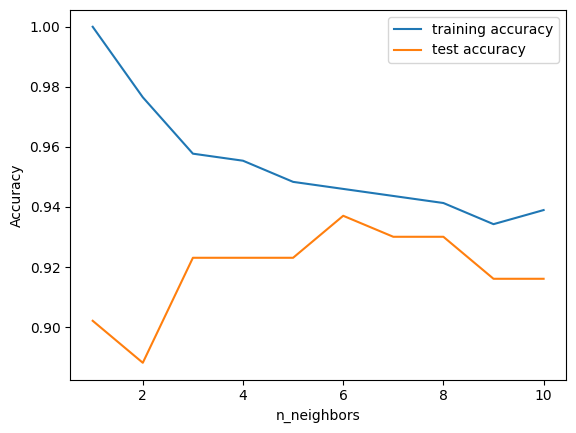

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#   # the fit method returns object self, so we can instantiate
#   # and fit in one line
#   clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
#   mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
#   mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
#   ax.set_title("{} neighbor(s)".format(n_neighbors))
#   ax.set_xlabel("feature 0")
#   ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

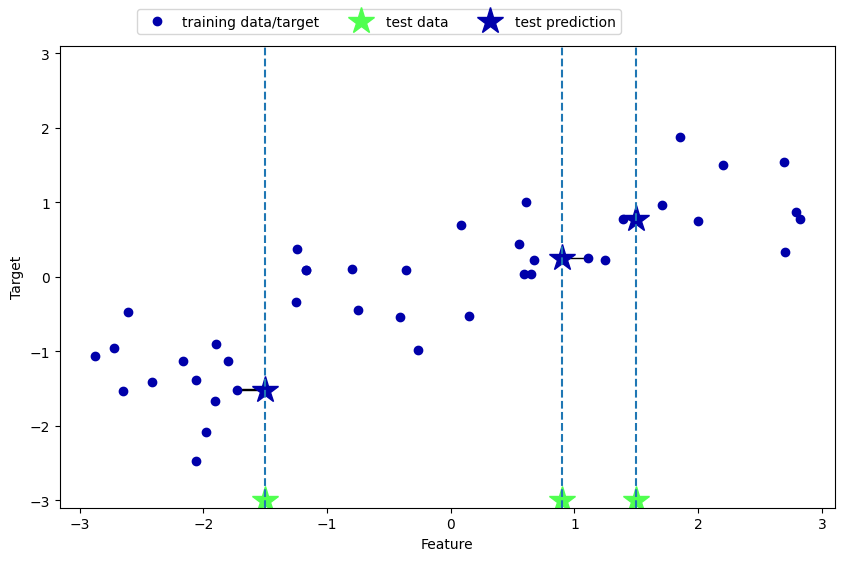

In [ ]:
#k-neighbors regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

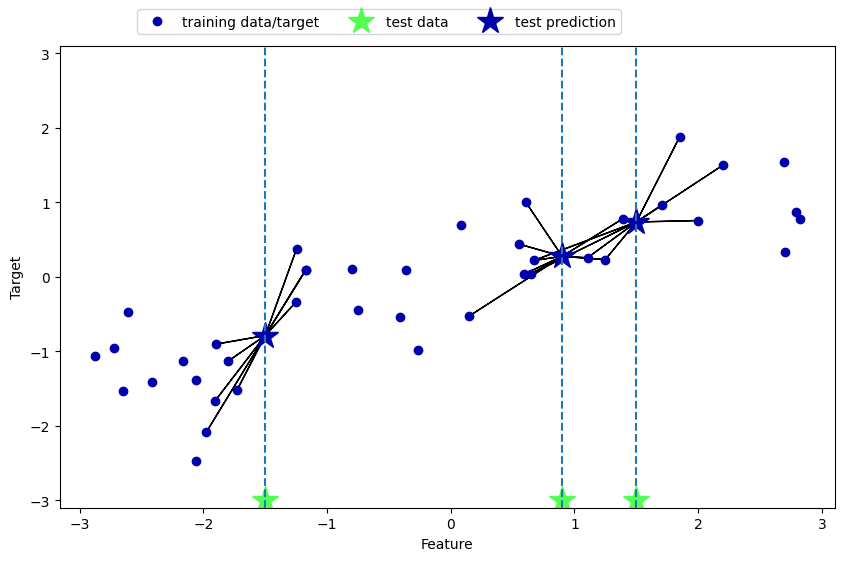

In [ ]:
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[ 0.42999717 -0.05396539 -0.12350225  0.16941863 -0.08973653 -0.8301424
 -1.62784743 -0.09712694  0.16941863 -1.62784743]


In [ ]:

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.74


Socre of 0.74 is a decent model fit

## Analyze kNeighbors Regressor

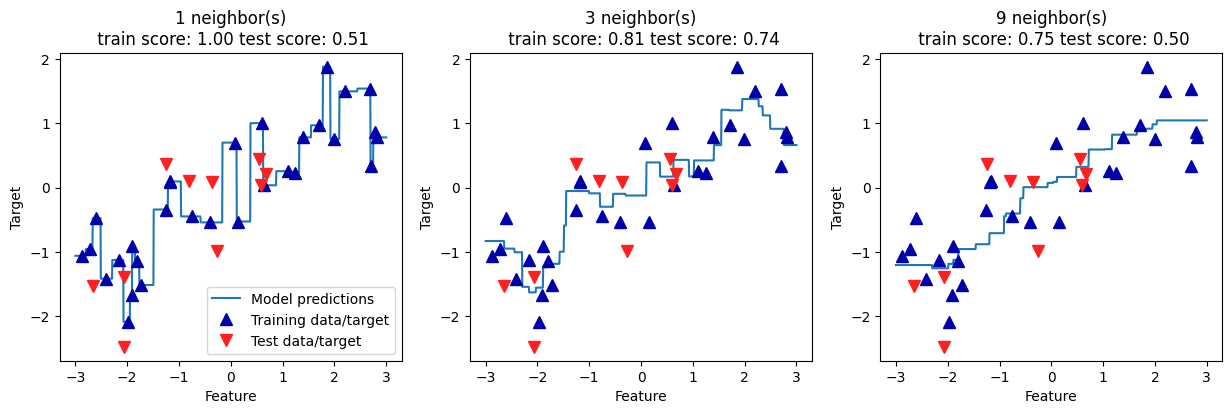

In [ ]:
from os import linesep
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced b/w -3 & 3
line= np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes): #1,3,9 = diff neighbor parameters
  #make predictions using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# Linear models


w[0]: 0.393906  b: -0.031804


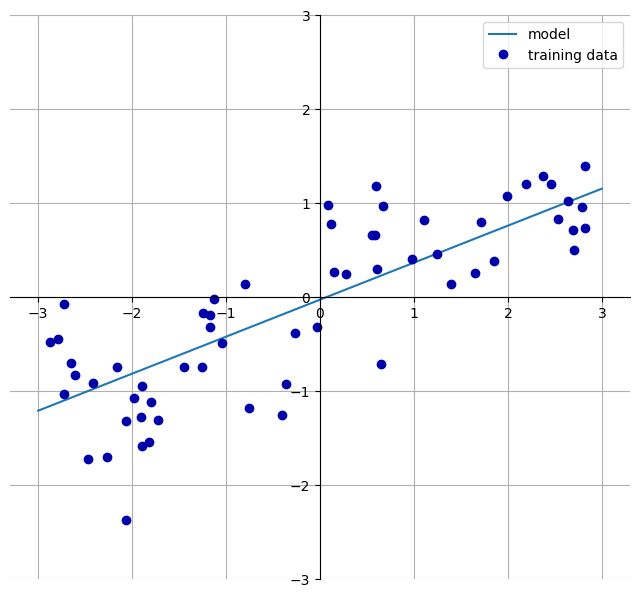

In [ ]:
mglearn.plots.plot_linear_regression_wave()

Linear regression aka ordinary least squares

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [ ]:
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test, y_test)))

Training set score: 0.670089
Test set score: 0.659337


## While R^2 of 0.66 is not good, the fact that the training and testing scores are close together means that we are more likely underfitting the data instead of overfitting it.

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Model correctly predicted the class for 95% of the samples in the training set.
Model correctly predicted the class for 61% of the samples in the testing set.

Problem is that this is the large discrepancy b/w training/testing is because of overfitting.


Alternative to linear regression = ridge regression
# **Ridge regression**
## Similar to linear reg but coeff predict well on training data AND uses regularization (when coeff are as small as possible - close to 0)
## Regularization stops a model from overfitting.

In [ ]:
#import Ridge from sklearn
from sklearn.linear_model import Ridge
#alpha default to 1.0
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Model correctly predicts the class of 89% of samples in training set and 75% of samples in testing set.

*   Training set score decreases & testing score increases
*   Ridge = less complex model that yields worse performance on trainig set but better performance on testing = better generalization.

# **Choose the Ridge Regression over the linear regression b/c the goal is to get the highest generalization**



Ridge regression makes tradeoff b/w model simplicity and training set performance.

Alpha parameter (default = 1.0) determines emphasis on simplicity vs training set. Best alpha based on dataset.
## **Increasing alpha pushes coefficients to 0 = decreases training set performance**

In [ ]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge10 = Ridge(alpha=10).fit(X_train, y_train) #alpha=10
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge8 = Ridge(alpha=8).fit(X_train, y_train) #alpha=8
print("Training set score: {:.2f}".format(ridge8.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge8.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.65


In [ ]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge25 = Ridge(alpha=25).fit(X_train, y_train) #alpha=25
print("Training set score: {:.2f}".format(ridge25.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge25.score(X_test, y_test)))

Training set score: 0.73
Test set score: 0.56


In [ ]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge2 = Ridge(alpha=2).fit(X_train, y_train) #alpha=2
print("Training set score: {:.2f}".format(ridge2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge2.score(X_test, y_test)))

Training set score: 0.86
Test set score: 0.73


In [ ]:
#adjusting the alpha parameter - increasing it pushes coefficients to 0 and reduces training set performance
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) #alpha=0.1
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


## With a very small alpha of 0.1, coefficients are not restricted and results are similar to linear regression

Model correctly predicts class of 93% of samples in training set and 77% of samples in testing set.

## Plot different alpha parameters effect on model.

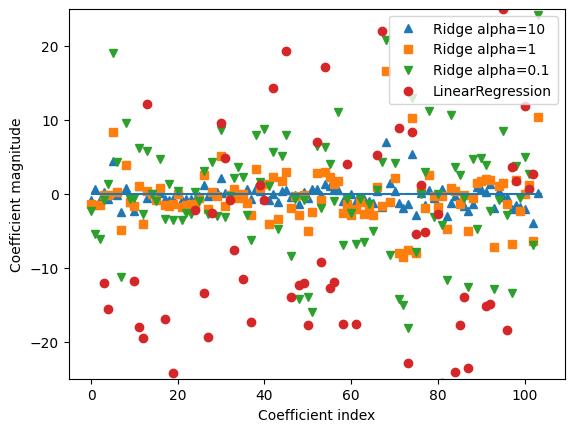

In [ ]:
#plot how different alpha parameter changes model
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

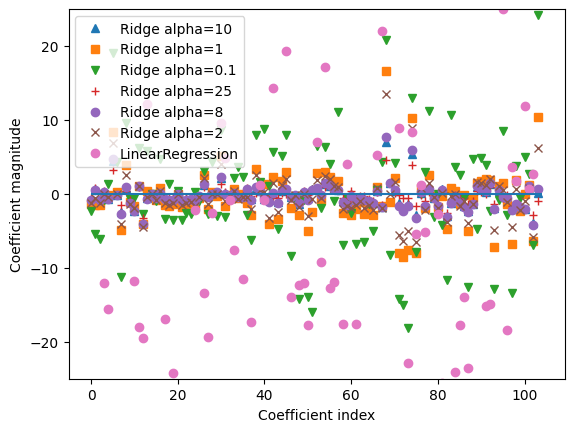

In [ ]:
#PLOT ALL THE DIFFERENT ALPHA PARAMETERS
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge25.coef_, '+', label="Ridge alpha=25")
plt.plot(ridge8.coef_, 'o', label="Ridge alpha=8")
plt.plot(ridge2.coef_, 'x', label="Ridge alpha=2")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

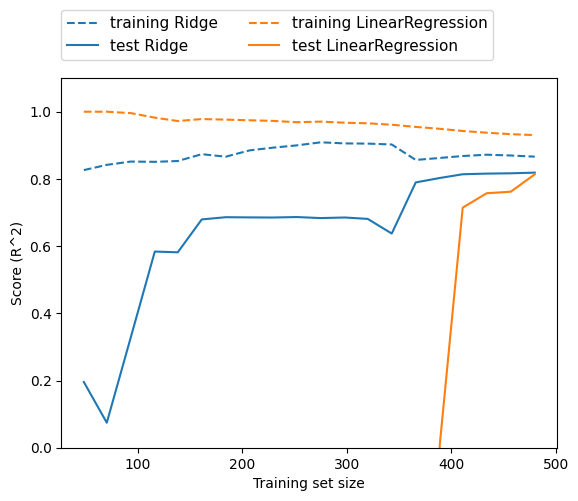

In [ ]:
mglearn.plots.plot_ridge_n_samples()


*   Training score higer than test score overall
*   Ridge training score lower than lr training score b/c of regularization
*   Ridge test better for smaller subsets
*   For < 400 data pts, lr doesn't work - won't learn anything

## **Regularization is less important when there is a lot of training data & linear/ridge will perform the same. If more data added = harder to overfit model**





# **Lasso**
## Alternative to linear & ridge
*   Restricts coeff to 0 using L1 regularization
*   **L1 regularization = some coef=0, means it ignores some features = *automatic feature selection***
*   Model is easier to interpret
*   Reveals important features in model





In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Model does not perform well. It correctly predicts the class of 29% of the samples in training set and 21% of samples in testing set.

Only uses 4 out of 105 features

### **Lasso can be altered by parameter, alpha**

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.01
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) #alpha=0.01
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


Model correctly predicts class of 90% of the samples in training set and 77% of samples in test set.

*   Smaller alpha = fit more complex model and performs better.
*   *But if alpha too low = removes regularization = overfits and results are similar to linear regression.*




## **Performs better than Ridge & uses 33/105 features - easier to understand.**

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.5
lasso05 = Lasso(alpha=0.5, max_iter=100000).fit(X_train, y_train) #alpha=0.5
print("Training set score: {:.2f}".format(lasso05.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso05.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso05.coef_ != 0)))

Training set score: 0.61
Test set score: 0.50
Number of features used: 6


Model correctly predicts class for 61% of training set and 50% of testing set and uses 6/105 features.

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.25
lasso025 = Lasso(alpha=0.25, max_iter=100000).fit(X_train, y_train) #alpha=0.25
print("Training set score: {:.2f}".format(lasso025.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso025.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso025.coef_ != 0)))

Training set score: 0.72
Test set score: 0.59
Number of features used: 7


Model correctly predicts class for 72% of training set and 59% of testing set and uses 7/105 features.

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.1
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train) #alpha=0.1
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.77
Test set score: 0.63
Number of features used: 8


Model correctly predicts class for 77% of training set and 63% of testing set and uses 8/105 features.

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.05
lasso005 = Lasso(alpha=0.05, max_iter=100000).fit(X_train, y_train) #alpha=0.05
print("Training set score: {:.2f}".format(lasso005.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso005.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso005.coef_ != 0)))

Training set score: 0.83
Test set score: 0.69
Number of features used: 18


Model correctly predicts class for 83% of training set and 69% of testing set and uses 18/105 features.

In [ ]:
#CHANGE ALPHA PARAMETER TO 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) #alpha=0.0001
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Model correctly predicts class for 95% of training set and 64% of testing set and uses 96/105 features.

## Plot coefficients of different models

Text(0, 0.5, 'Coefficient magnitude')

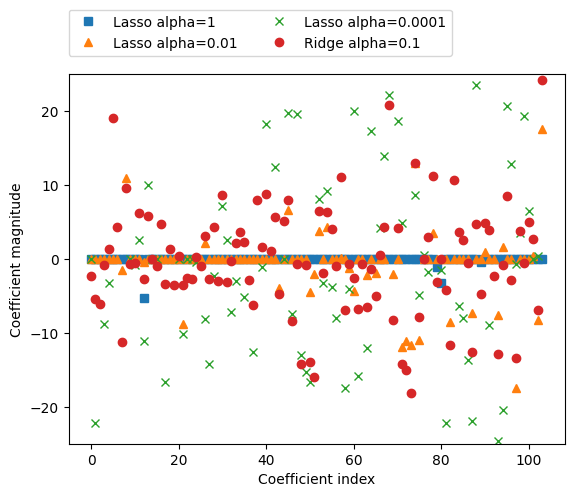

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'x', label="Lasso alpha=0.0001")


plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

### Summary
### At alpha=1 - most coef=0 & rest are very small
### At alpha=0.01 - most features = 0
### At alpha=0.0001 - unregularized model w/ big coefs and non-zeros

Text(0, 0.5, 'Coefficient magnitude')

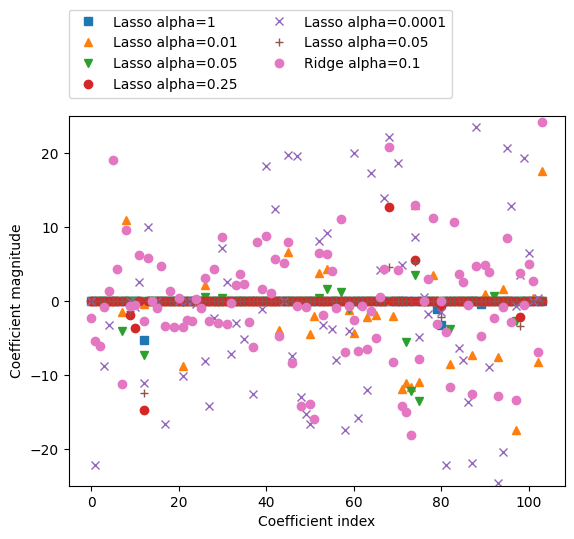

In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso005.coef_, 'v', label="Lasso alpha=0.05")
plt.plot(lasso025.coef_, 'o', label="Lasso alpha=0.25")
plt.plot(lasso00001.coef_, 'x', label="Lasso alpha=0.0001")
plt.plot(lasso05.coef_, '+', label="Lasso alpha=0.05")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear models for classification
*   If function < 0, predict class -1.
*   If function > 0, predict class +1
*   Linear (binary) classifier separates 2 classes w/ line, plane or hyperplane
*   Algorithms for learning models differ in 2 ways: (1) how thye meausre how well combo of coefficients & intercept fits training data & (2) regularization
*   Diff algo choose diff ways to measure what fitting training set well means
*   2 most common linear classification algo = logistic regression & linear support vector machines (linear SVMs)
*   Logistic regression = classification algo NOT regression algo. Don't confuse w/ lin reg




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


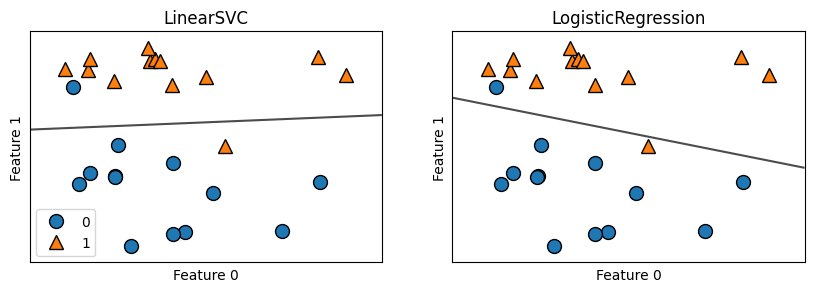

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#use the forge dataset
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0") #put 1st feature on x-axis
  ax.set_ylabel("Feature 1") #put 2nd feature on y-axis
  axes[0].legend()




*   X-axis = 1st feat, y-axis = 2nd feat
*   Decision boundary = straight line
*   Both models misclassify 2 points
*   Both apply L2 regularization sim to Ridge
###   **Adjustable parameter is C and determines strength of regularization**
###    **Higher C = less regularization**
*   High C tries to fit training data, low C pushes coefs to 0
*   List item











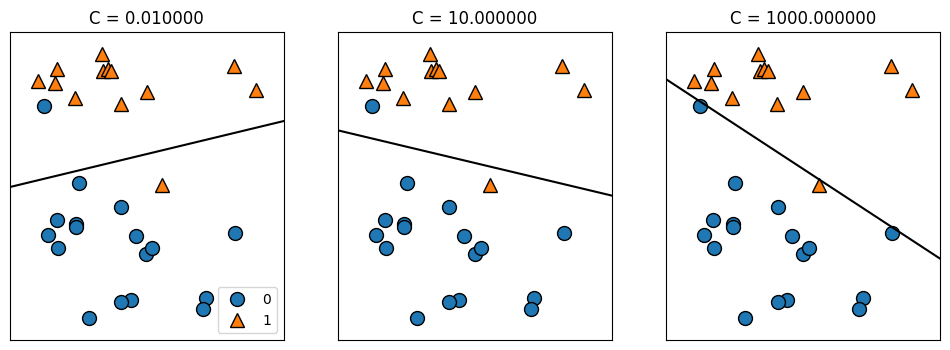

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

### Left model
*   small C = lots of regularization
*   all but 1 class 0 pts at bottom & all but 1 class 1 pts at top
*   decision boundary = relative horizontal line

### Center model
*   Tilts decision boundary b/c higher C
*   Focuses on the 2 misclassified points


### Right model
*   Tilts decision boundary
*   Correctly classifies all pts in class 0
*   Focuses on trying to classify all the points = overfitting


## In high dimensions, linear models for classification are powerful and stopping overfitting is important when considering more features.






In [ ]:
#DEFAULT C=1

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 95% of samples in training set and 96% of samples in testing set.

## **B/c training/tesing scores are so close = underfitting**

In [ ]:
#CHANGE C TO 10
logreg10 = LogisticRegression(C=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 96% of samples in training set and 96% of samples in testing set.

Underfitting

In [ ]:
#CHANGE C TO 50
logreg50 = LogisticRegression(C=50).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg50.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg50.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 94% of samples in training set and 96% of samples in testing set.

In [ ]:
#CHANGE C=100
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) #C=100
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 94% of samples in training set and 96% of samples in testing set.

In [ ]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) #C=0.01
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model correctly predicts class for 93% of samples in training set and 93% of samples in testing set.

## **Training & test set accuracy drops relative to default parameters**

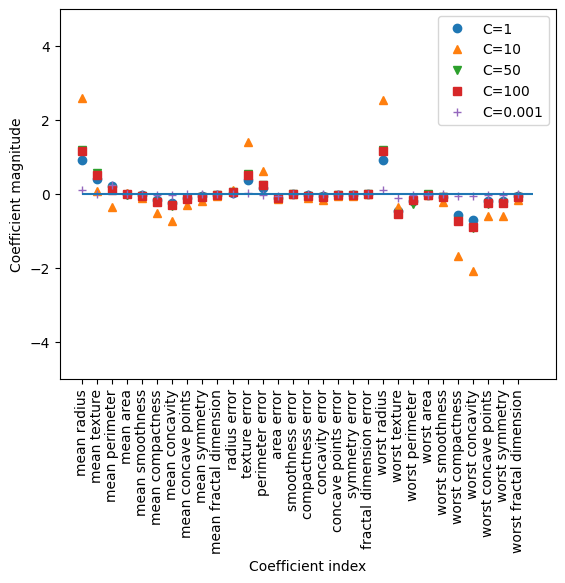

In [ ]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg10.coef_.T, '^', label="C=10")
plt.plot(logreg50.coef_.T, 'v', label="C=50")
plt.plot(logreg100.coef_.T, 's', label="C=100")
plt.plot(logreg001.coef_.T, '+', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Logisitic regression uses L2 regularization = results similar to Ridge

Stronger regularization pushes coefficients toward 0 but never actually will equal 0

For C=100 & C=1 - negative coefficients. C=0.001 had positive coefficient

Change of sign is due to mean perimeter - high mean perimeter could indicate benign or malignant

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


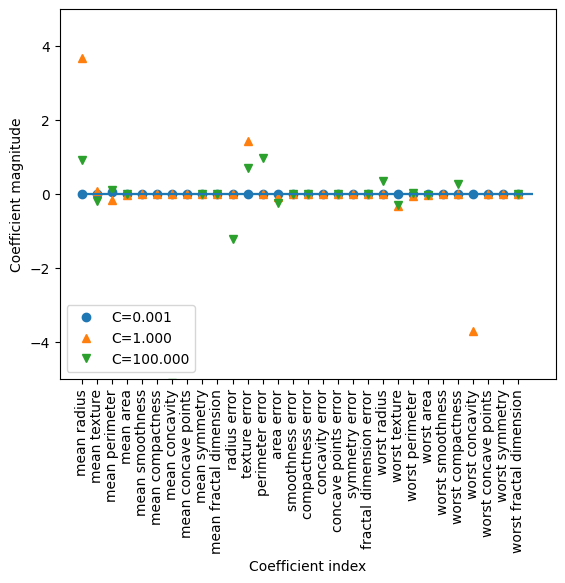

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1").fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

  plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
  plt.hlines(0, 0, cancer.data.shape[1])
  plt.ylim(-5, 5)
  plt.xlabel("Coefficient index")
  plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### **Difference between linear models for binary classification & linear models for regression**

- Penalty parameter - influences regularization & whether model will use all available features or use a subset



# Linear models for multiclass classification

*   Most linear classification models are only for binary classification and don't apply to multiclass, EXCEPT log reg
*   **One vs rest approach** - way to extend bin classific algo to multiclass classif algo

## **One-vs-rest approach**
*   binary model is learned for each class that tries to separate that class from the other classes = same # binary models as classes
*   Binary classifiers run on test pt - Highest score classifier on its single class wins & that's the class used for prediction








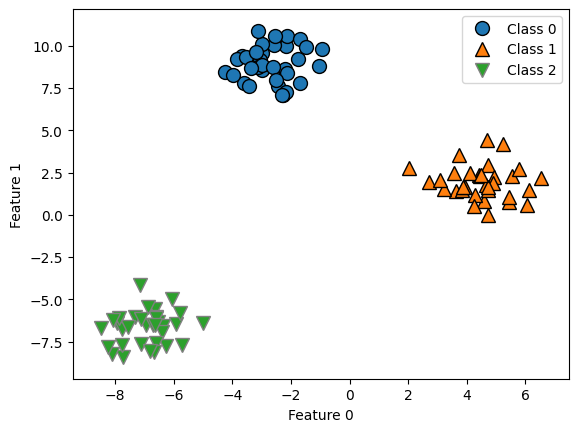

In [ ]:
#2D toy dataset w/ 3 class classification

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### Train a LinearSVC classifier on this dataset

In [ ]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shpae: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shpae:  (3,)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Shape of (3,2) = each row of coef_ has coeff vector for 1/3 classes & each col has coef value for specific feature.

Intercept_ is 1D array that stores intercepts for each class

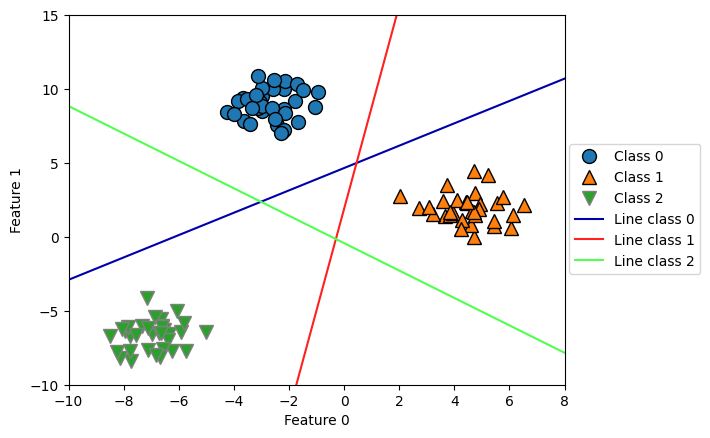

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

**Summary**
*   Pts in class 0 training data are above class 0 line = **on the class 0 side of this binary classifier**
*   Class 0 pts are above class 2 line & to left of class 1 line = classified as "*rest*" by the binary classifier
- Any pt will be labeled as class 0 by final classifier


**What about triangle in middle?**
- All 3 binary classifiers will label pts as "*rest*" in this triangle area

**What class would  a point in triangle be assigned to?**
- class of closest line = highest value for classification formula



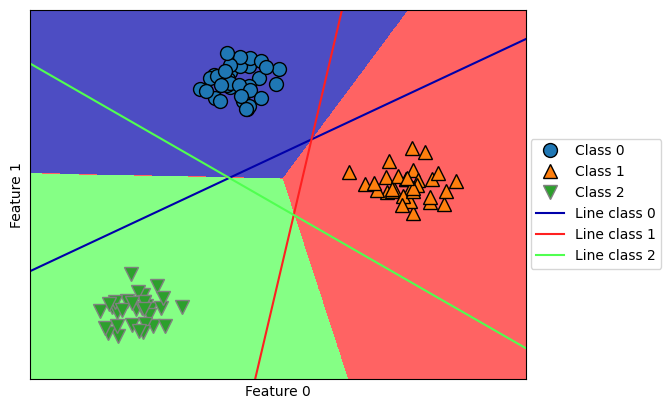

In [ ]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
  plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
  plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
              'Line class 2'], loc=(1.01, 0.3))
  plt.xlabel("Feature 0")
  plt.ylabel("Feature 1")

## **Strengths, weaknesses, and parameters**
- Main parameter of linear models = regularization parameter
-- alpha for regression models
-- C in LinearSVC & Log reg

### **Big alpha & small C = simple models**

- C & alpha used on log scale

### L1 or L2 regularization
- L1 if only a few features and/or interpretability of the model are important
-- L1 uses fewer features = easier to expalin which ones are important their effects
- L2 otherwise

### PROS
- fast to train/predict
- scale well for large and small datasets
- can use solver='sag' for humongous datasets
- easy to understand how predictions are made using formulas
- linear models perform well when # features > # of smaples

### Cons
- Not clear on why coefficients are that
- hard to interpret coeff for highly correlated features
- not good for lower dim spaces



In [ ]:
#METHOD CHAINING
#fit method of scikit-learn models returns self

#instantiate model & fit it in 1 line
logreg = LogisticRegression().fit(X_train, y_train) #used return value of fit (self) to assign trained model to logreg var
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test) #use method chaining - concatenation of method calls  (.fit().predict())

#Can do model instantiation, fitting, and predicting on single line
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **Naive Bayes Classifier**
- Faster in training than linear
- tradeoff is slightly worse generalization performance than log reg & LinearSVC
- efficient b/c they learn parameters by looking at features individually & collecting per-class stats from each

## 3 types of Naive Bayes classifiers
1.   GaussianNB - continuous data
2.   BernoulliNB - binary data
3.   MultinomialNB - count data

- Latter 2 used for text data classification - BernoulliNB counts how often ever features of each class is not 0






In [ ]:
# 4 data pts w/ 4 binary features each. 2 classes - 0, 1
#1st feature has (0) 2x, (1) 2x
#2nd feature has (0) 1x, (1) 3x
#3rd feature has (0) 3x, (1) 3x
#4th feature has (0) 2x, (1) 2x

X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [ ]:
counts = {}
for label in np.unique(y):
  #iterate over each class
  #count (sum) entries of 1 per feature
  counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- MultinomialNB - acocunts for avg value of each feature for each class
- GauusianNB - stores avg value & SD of each feat for each class

### Making predictions
- compare data pt to stats for each of classes
- best matching class predicted
- for multi & bern - prediction formula sim to lin models
- However, coef does not mean the same as in lin models


## **Strengths, weaknesses, and parameters**
- MultinomialNB & BernoulliNB have 1 parameter (**alpha**) - controls model complexity
- Algo adds to the data *alpha* many virtual data pts that have positive values for all features
- Results in smoothing of stats
###**Large alpha = more smoothing = less complex models**

- But b/c algo is robust to alpha, don't have to set it to get a good performance. . But tuninng it improves accuracy.

- GaussianNB - for high-dim data
- Bern/Multi - good for sparse count data (text)
- Multi performs better than Bern esp on datasets w/ lots of nonzero features

- Similar pros/cons as linear models
- fast to train/predict
- easy to comprehend
- work well w/ high-dim sparse data
- robust to parameters

### **NB has great baseline models and often used on large datasets when it takes too long to train linear models**

# **Decision Trees**
- hierarchy of if/else questions, leading to decision

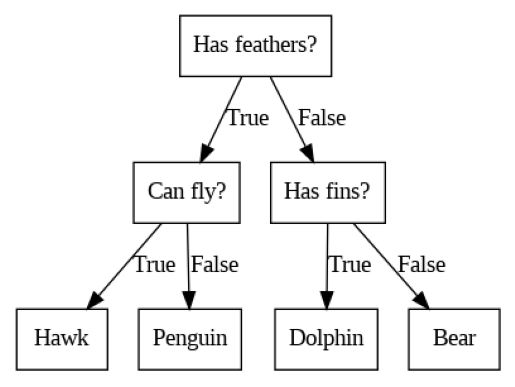

In [ ]:
mglearn.plots.plot_animal_tree()

### Builds a model to distinguish b/w 4 classes of animals using 3 features (has feathers, can fly, and has fins).

## **Buildling decision trees (dt)**
*   Will build dt for 2D classificaiton dataset that has 2 half-moon shapes, w/ each class having 75 data pts
*   Understanding dt means learning sequence of if/else questions (aka tests) that gets to the true answer the quickest
*   Tests (q's) used for continuous data = "is feature *i* larger than value *a*?

### **two_moons example**
- To build tree, algo searches all possible tests & finds one that's most informative about target variable
- Split dataset horizontally at x[1]=0.0596 best separates pts in class 0 & 1
- top node = root = represents entire dataset
- recursive process makes binary tree of deciison, w/ each node having a test
-- test is like splitting the part of data being considered along 1 axis
- recursive partitioning of ata repeated until each region has a single target value
- to predict new data pt, check which region of partition of feature space the pt lies in & then predictting majority target in that region
- find region by traversing tree from root and going left/right
- can use trees in regression - for predictions, traverse tree based on tests in each node & find leaf of the new data pt falls into
- output = mean target of training pts in leaf



## **Controlling complexity of decision trees (dt)**
*   Creating dt w/ all pure leaves = complex models that overfit to training data (100% accuracy)

2 ways to stop overfitting
1.   Pre-pruning - stop tree creation early
- Criteria for pre-pruning = limit max depth of tree, limit max # leaves, have min # pts in node
2.   Post-pruning aka pruning - build tree then collapse nodes of useless info

*   scikit-learn only does pre-pruning - DecisionTreeRegressor & DecisionTreeClassifier classes
*   Import data set, split it
*   Build model using default setting of fully devloping tree
*   Fix random_state in tree = tie-breaker





In [ ]:
from sklearn.tree import DecisionTreeClassifier

#import dataset
cancer = load_breast_cancer()
#split into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
#fix the random_state - for tie breaking
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


### **Overfits the training data b/c leaves are pure - 100% accruate. But correctly predicts 93.7% of samples in testing set**

- Unpruned trees tend to overfit & not generalize to new data

### **Pre-pruning the tree**
- Stop building after certain depth reached
- Set max_depth=4 - only 4 tests done (q's)
- Will decrease training set accuracy & inmprove test set


In [ ]:
#Set max_depth=4 - only 4 tests done so iti limits tree growth
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
#fit the tree to training set
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on testing set: 0.951


**Model correctly predicts the class for 98.8% of samples in training set and 95.1% of samples in testing set.**

###**Analyzing decision trees**
- tree module has export_graphviz function that creates .dot file, which is text file format for storing graphs
- color nodes to represent majority class

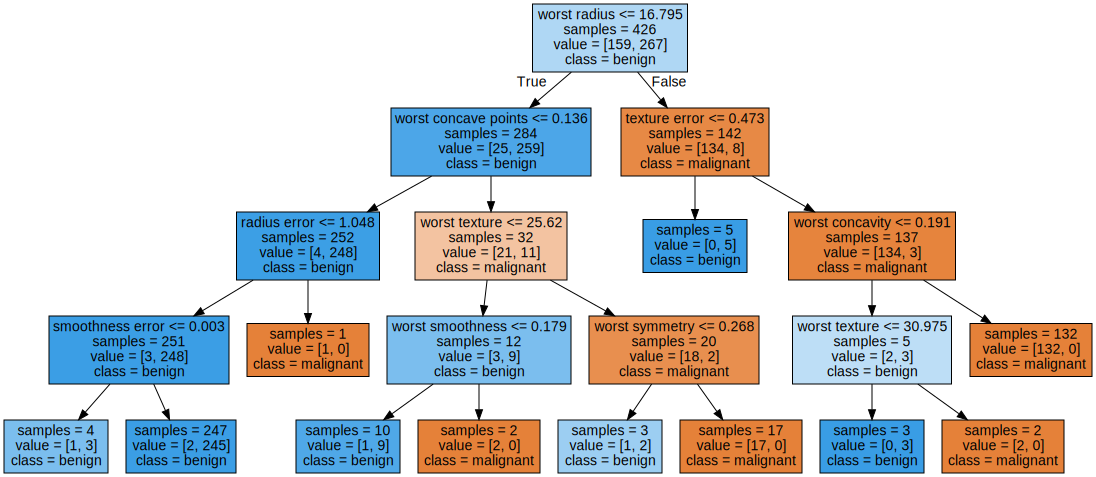

In [ ]:
#visualize the decision tree for breast cancer data using export_graphviz
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)


import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

**Analysis of viz**
- Tree diagram makes sense to nonexperts on how mach learn algo works
- But even w/ smaller depth, still overwhelming and deeper trees are hard to understand
- Helpful way to inspect tree is to find which path most of the data actually takes
- Branches to right of worst radius > 16.795 has 8 benign & 134 malignant samples
- Branches to left of worst radius <= 16.795 - 25 malignant & 259 benign samples

### **Feature importance in trees**
- looking at tree is overwhelming - so using a summary can explain the inner workings of tree
- **feature importance** - rates how important feature is for deicion tree makes
--  b/w 0/1
-- 0 = not used
-- 1 = perfectly predicts target
### **feature importance always totals 1**

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


- Depict feature importance similar to how you depict coefficients in linear model

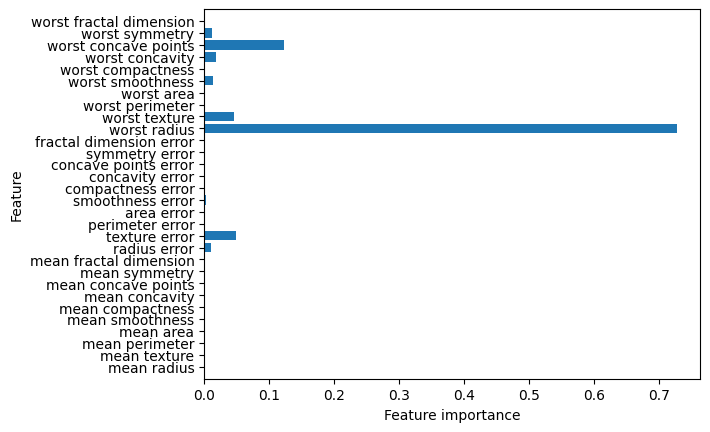

In [ ]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

**Analysis of viz**
- worst radius = most important feature (was also used as top split in decision tree)
- this means that hte 1st level already separates 2 classes very well
- But a low value feature **DOES NOT** mean that the feature in useless. It means the tree didn't pick the feature b/c another feature encodes same info
- **feature importance is always positive and doesn't encode which class a feature is indicative of**

Feature importances: [0. 1.]


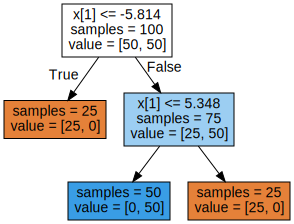

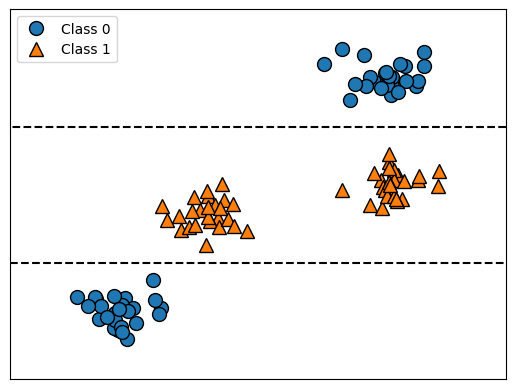

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**Analysis of viz**
- Dataset w/ 2 features & 2 classes
- All info is in X[1] & X[0] not used
- Output class is not monotonous = can't say high value of X[1] = class 0 & low value = class 1 & vice versa

**Regression trees**
- similar to classification trees
- ### **CANNOT extrapolate or make predictions outside of training data range**


Text(0, 0.5, 'Price in $/Mbyte')

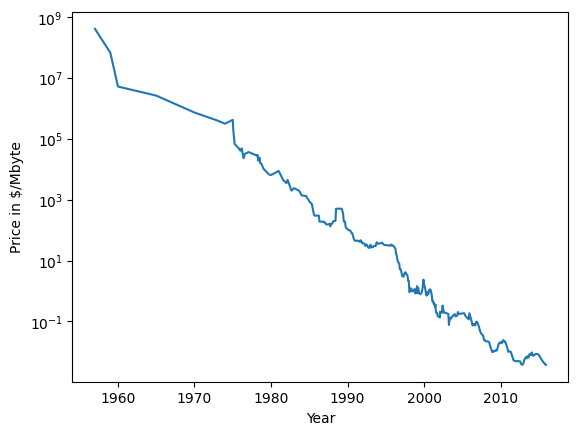

In [ ]:
import os
#upload dataset of historical computer memory prices
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

#plot date & price features
plt.semilogy(ram_prices.date, ram_prices.price)
#add axes labels
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

**Analysis of viz**
- used log scale for y-axis
- w/ logs, easy to predict b/c relationship seems linear

- For next chart, will forecast for yrs post 2000 using hist data, w/ date as only feature

- Compare 2 models
1. DecisionTreeRegressor
2. LinearRegression

- **rescale prices using log = relatively linear relationship - makes diff for LinReg**
- apply exponential map to undo log transform
- make predictions on whole dataset but real eval only done on testing set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#use hist data to forecast prices post 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

#predict prices based on date
X_train = data_train.date.values[:, np.newaxis] # convert to NumPy array first
#use log-transform to get simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#predict on ALL data
X_all = ram_prices.date.values[:, np.newaxis] #had to add .values b/c w/o it resulted in error

pred_tree = tree.predict(X_all) #decision tree regression w/ log
pred_lr = linear_reg.predict(X_all) #linear regression w/ log

#undo log transform
price_tree = np.exp(pred_tree) #decision tree reg sans log
price_lr = np.exp(pred_lr) #linear reg sans log

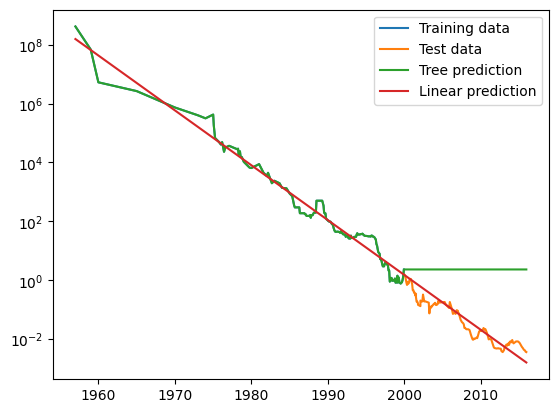

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

**Analysis of viz**
- Linear model (red)
-- Approximates a line = good for forecasting of test data but ignores some finer variations in training/testing sets
- Tree model (green)  
-- Perfectly predicts training data
-- Unrestricted so model learned all of training data
-- But once out of the range, can't generate new responses = no forecasting past 2000 = repeats last known data pt


### **Strengths, weaknesses, & parameters**
- Pre-pruning parameters stop buildling
-- max_depth
-- max_leaf_nodes
-- min_samples_leaf

**PROS**
- 2 adv of DT
-- easily visualized model & understood by nonexperts
-- invariant to scaling of data = no preprocessing like normalization/standardization needed

**CONS**
- overfit & poor genearlization despite pre-pruning

# **Ensembles of Decision Trees**
- methods that combine mult mlm to create more powerful models
- 2 types that use dt as foundation
1. Random forests
2. Gradient boosted decision trees



## **Random forests**
- Collection of decision trees, w/ each tree diff than next
- Logic - each tree can predict well but will overfit data. By having lots of trees that predict & overfit = reduce amount of overfitting by averaging results.
- Name derives from injecting randomness into tree building so each tree is different via 2 ways:
-- Select data pts that build tree
-- Selecting features in each split test



## **Building random forests**
- 1st - decide on # trees to build (n_estimators parameter) - algo makes diff choices to create unique trees
- To build tree, take *bootstrap sample* of data = repeatedly draw example randomly w/ replacement from n_samples
-- This creates dataset that's same size as original but missing some data pts and repeating some others
- 2nd - build decision tree based on new dataset. Instead of looking for best test for each node, in each node the algo randomly selects subset of features and looks for best possible test invoving one of the features
-- max_features parameter determines # features
-- Repeats selection of subset of features in each node so each node in treen makes a deicion using diff feature subset
- This bootstrap sampling results in each tree built on slightly diff dataset - split in each tree operates on diff subset of features
- **high max_features** = similar trees that can fit data using most distinctive features
- **low max_features** = diff trees that need to be very deep to fit data

- To make prediction suing random forest, algo makes prediction for every tree in the forest
- For reg - avg resutls to get final prediction
- For classification - use soft voting strategy = algo makes soft prediction, giving prob for each possible output label
- Avg prob for all trees & clas w/ highest prob predicted







In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

#have data w/ 100 pts
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#build random forest w/ 5 trees
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

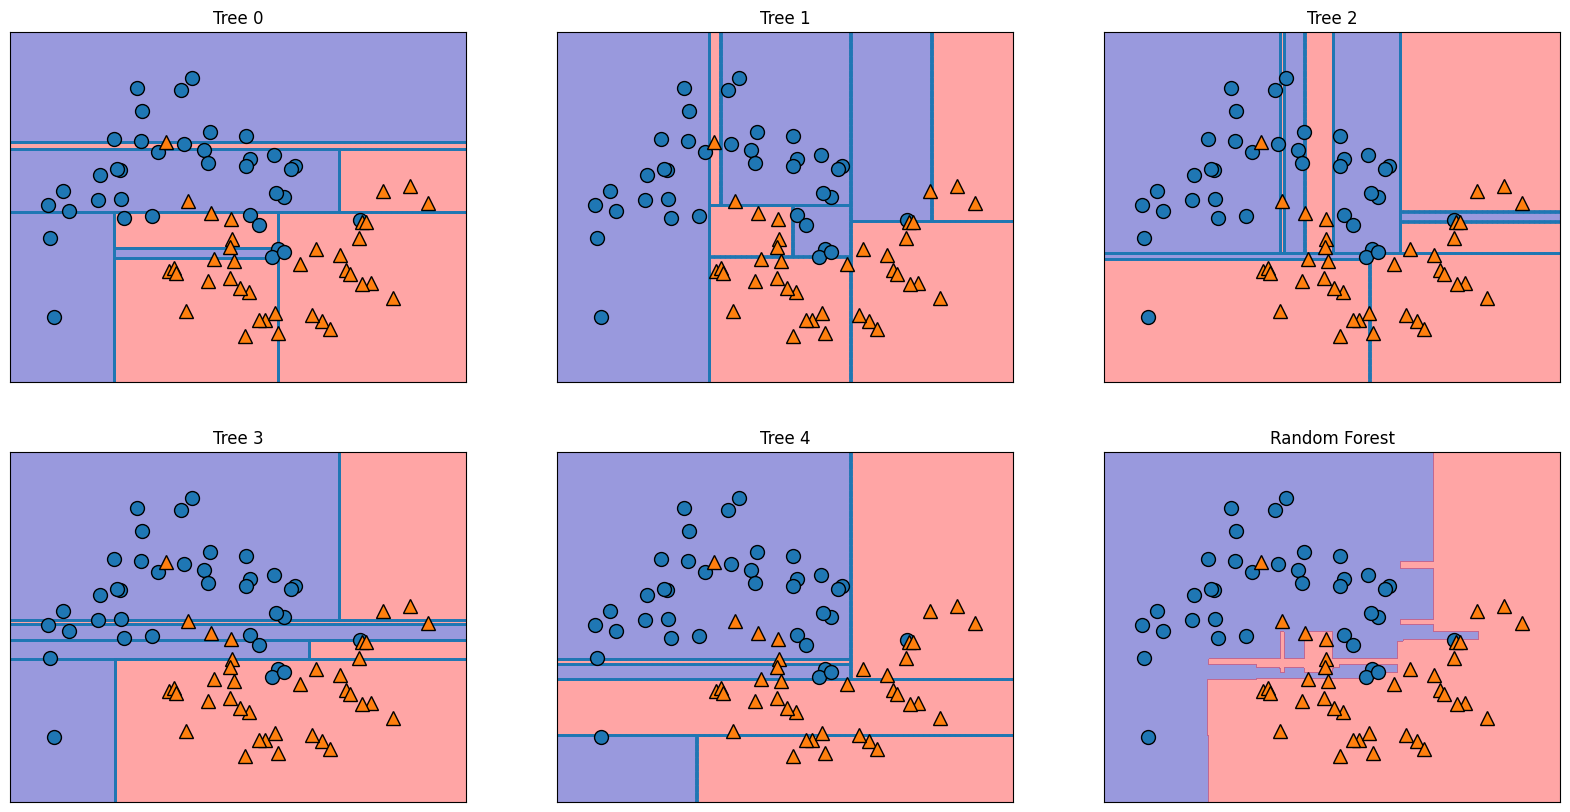

In [ ]:
#Visualize decision boundaries leared by each tree, together w/ aggregate prediction made from forest

#random forest overfits less than any individual trees and has more intuitive decision boundary
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
#Random forest with cancer dataset
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


### Summary
- Random forest gives accuracy of 97% better than the linear models or just a single decision tree, sans adjusting parameters.

- Random forest gives feature importances - calculated by aggregating feature imporatnces over trees in forest

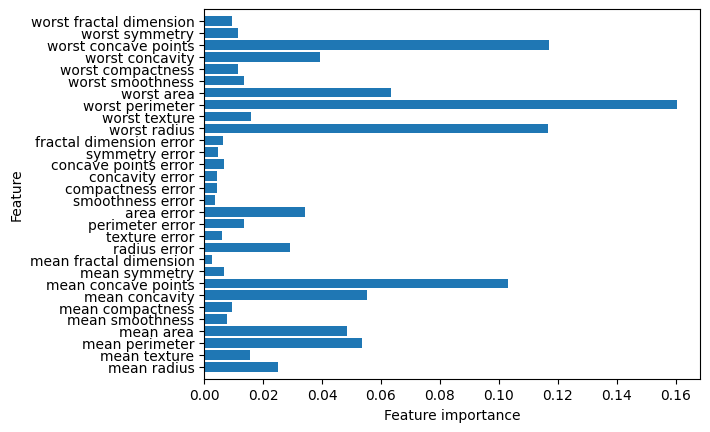

In [ ]:
#Visualize feature importance
plot_feature_importances_cancer(forest)

### Interpretation
- Random forest gives nonzero importance to more features than 1 tree
- Gives lots of importance to "worst radius" feature
- Chooses "worst perimeter" as most important feature
- Randomness used to create forest - means it captures broader pic of data



### **Strengths, weaknesses, & parameters**
- Most widely used machine learning method
- Powerful and work well w/o parameter tuning
- No scaling required
- Not good if you need a compact representation of decision-making process - use decision trees instead
- Hard to interpret many trees
- Changing the random states (random_state) changes model
- More trees in forest = more robust against choice of random state
- NOT for high dim, sparse data, like text data
- Slower to learn and predict than linear models - require lots of memory

**Main parameters**
- **n_estimators** (larger the better)
- **max_features** (controls # features)
- **max_depth** (pre-pruning)


### **Gradient boosted regression trees (gradient boosting machines)**
- Ensemble method that combines multiple decision trees to create powerful model
- Used for regression & classification
- Works by building trees in serial manner - each tree corrects mistakes of the last
- **NO RANDOMIZATION**
- Uses pre-pruning
- Use shallow trees, of depth 1-5 = uses less memory & has faster predictions
- Combines simple models *(weak learners)*
- Each tree has good predictions on part of the data = more trees iteratively improve performance
- Widely used in industry
- Main parameters
-- **learning_rate** - controls how strongly each tree tries to correct past mistakes
-- Higher learning rate = stronger corretions = complex model
-- **n_estimators** - adds more trees = increase model complexity


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


**Summary**
- Overfits b/c training set accuracy is 100%
- Pre-prune by limiting max depth or lowering learning rate to reduce overfitting

In [ ]:
##Pre-purne via lowered max depth
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.990610
Accuracy on test set: 0.972028


In [ ]:
##Pre-prune via lowered learning rate
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988263
Accuracy on test set: 0.965035


**Summary**
- Lowered max depth & learner rate decreased training set accuraccy
- **Lowered max-depth significantly improved model**
- Lowered learning rate only increased generalization performance slightly

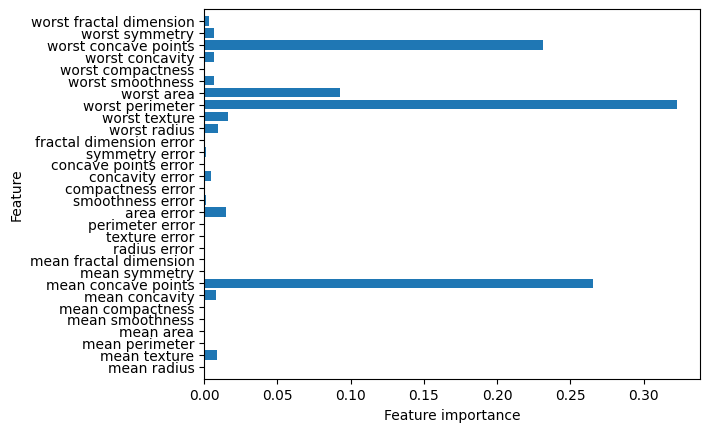

In [ ]:
##Visualize feature importance

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

**Summary**
- Feature importance similar to random forests but gradient boosting ignored some features

- Best method is to try random forests first, which is pretty robust.
- If you need faster predictions or the greatest accuracy, then use gradient boosting
- Use xgboost package to apply to large-scale problems


### **Strengths, weaknesses, and parameters
- Powerful and widely used
- CON
-- Require careful parameter tuning
-- NOT for high-dim sparse data
- MAIN PARAMETERS
-- **n_estimators**
-- **learning_rate** - controls howmuch tree can correct mistakes of old tree
-- **max_depth**  - reduces tree complexity

- Lower learning_rate = need more trees to build complex model
- Increasing n_estimators in gradient boosting = more complex model = overfitting
- best practice - fit n_estimators & look over different learning_rates.
- keep max_depth low for gradient boosted models (<= 5)



# **Kernelized Support Vector Machines**
- aka SVMs
- Allows for more complex models not defined by hyperplanes in input space



## **Linear models and nonlinear features**
- Linear models = limiting in low-dim spaces - lines/hyperplanes have limited flexibility
- **Add more features to linear models increase their flexibility** (ex: add interactions or polynomials)

Text(0, 0.5, 'Feature 1')

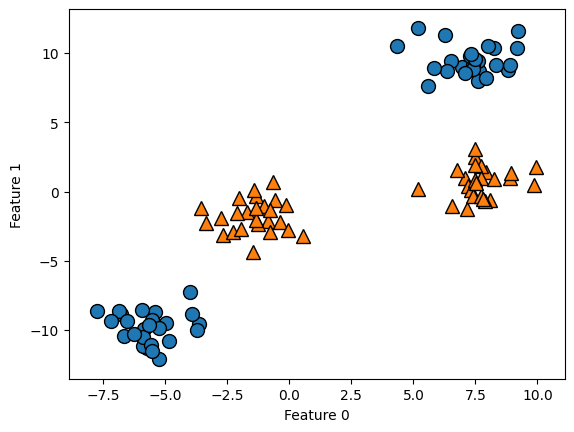

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Summary
- linear model for classification uses line to separate pts - won't do good job on dataset

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

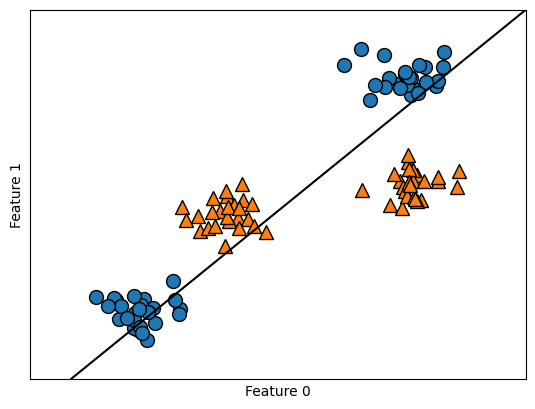

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Summary
- Line shows decision boundary using linear SVM
- Expand features by adding new feature, feature1 ** 2 (square of 2nd feature)
- Represent each data pt as 3D pt (feat 0, feat1, feat1**2)


In [ ]:
# add the squared second feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)

#plot first all pts w/ y == 0, then all w/ y ==1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2") # Set the z-axis label using the Axes3D object


<ipython-input-93-9b5299be6752>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-93-9b5299be6752>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

### Summary
- book shows that the code depicts pts in 3D grid space, but for some reason it won't show here

- now able to separate 2 classes using linear model, plance in 3D


In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-94-f9275de66f2c>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
<ipython-input-94-f9275de66f2c>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

### Summary
- image still does not show
- book image shows 3D space w/ pts and a decision boundary that runs southwest to northeast
- linear SVM model is an ellipse, not a line

Text(0, 0.5, 'Feature 1')

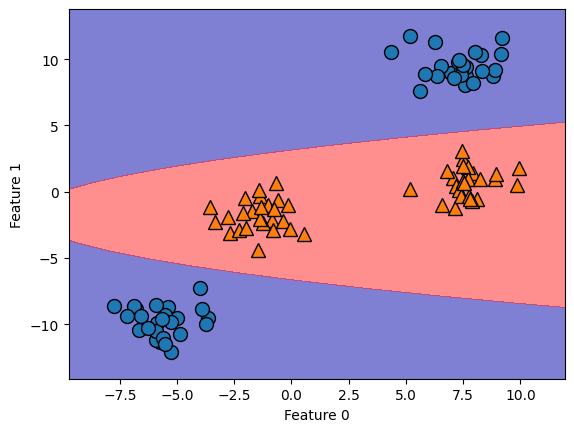

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## **The kernel trick**
- Adding nonlinear feat makes more powerful models
- But that can be expensive & we don't know which features to add
- Use kernel trick to determine how many features to add w/o actually computing it
- **kernel trick - computes distance (scalar products) of data pts for expanded feat representation w/o computing expansion**

- 2 ways
-- **polynomial kernel** - computes all possible polynomials up to certain degree of orig features
-- **radial basis function (RBF) aka Gaussian kernel** - considers all possible polynomials of all degrees but feat importance decreases for higher degrees




## **Understanding SVMs**
- In training - SVMs learn importance of each training data pts to rep decision boundary b/w 2 classes - will use subset of training pts to define decision boundary = these called support vectors
- how to predict new pt - measure dist to each support vector
- make classification decision based on distances to support vector & importance of support vectors learned in training)
- Gaussian kernel measures dist b/w data pts
- below fig shows deicison boundary in black & support vectors are bigger pts w/ wide outlines (3 blue circles, 2 orange triangles)


Text(0, 0.5, 'Feature 1')

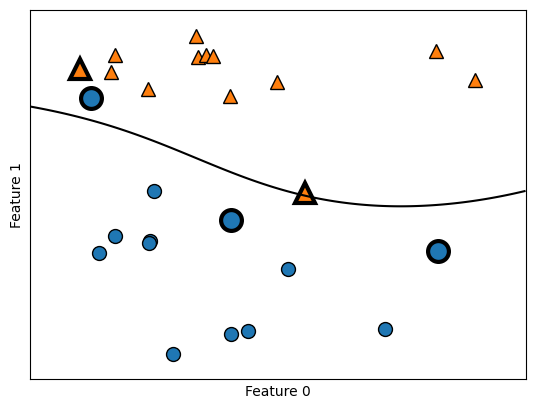

In [ ]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#plot support vectors
sv = svm.support_vectors_

#class labels of support vectors
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Summary
- smooth, nonlinear boundary
- adjusted 2 parameters: C & gamma


## **Tuning SVM parameters**
- **Gamma parameter**
-- inverse width of Gaussian kernel
-- determines how far influence of 1 training example reaches
-- low values = far reach, high values = limited reach
-- wider radius = further influence of each training example
- **C parameter**
-- regularization that limits importance of each pt (dual_coef)

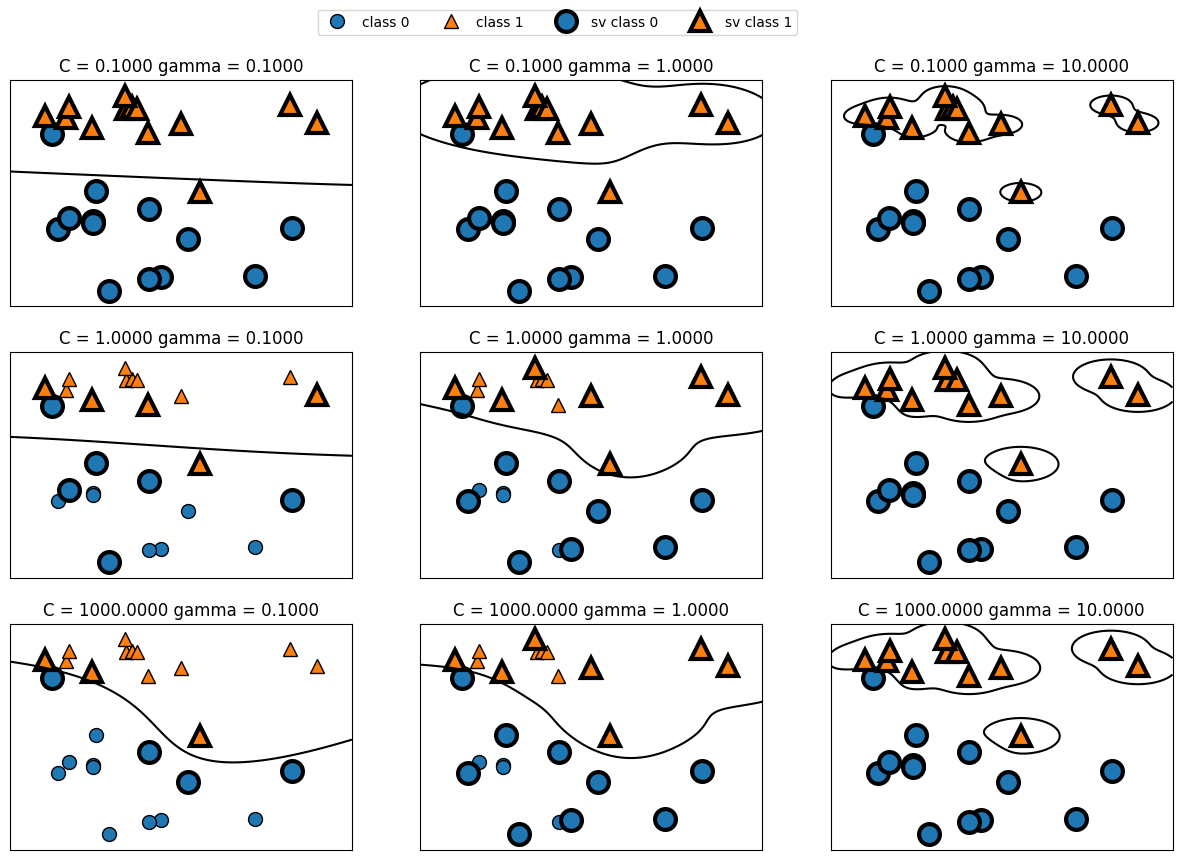

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
    ncol=4, loc=(.9, 1.2))

### Summary
- Left to right = increase gamma from 0.1 to 10
- small gamma = big radius for Gaussian kernel = lots of pts considered nearby
-- smooth decision boundaries on left & boundaries focusing on single pts on the right
-- low gamma = decision boundary slowly varies = low complex model
- Top to bottom